# Table of Contents
 <p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LogNorm
import tensorflow as tf
import time

In [2]:
def costfunc(x, y, m, b):
    """Compute the MSE cost of a prediction based on m, b.
    x: inputs array.
    y: observed outputs array.
    m, b: regression parameters.
    Returns: a scalar cost.
    """
    yhat = m * x + b
    diff = yhat - y
    # Vectorized computation using a dot product to compute sum of squares.
    cost = np.dot(diff.T, diff) / float(x.shape[0])
    # Cost is a 1x1 matrix, we need a scalar.
    return cost.flat[0]




In [3]:
np.random.seed(72)
N = 1024
x_data = np.linspace(-2.0, 2.0, N)
y_data = x_data * 2.25 + 6 + np.random.normal(loc=0, scale=1.5, size=N)
x_data1 = np.concatenate(([x_data], [np.ones_like(x_data)]), axis=0).T
y_store = y_data
x_store = x_data

In [4]:
np.random.seed(72)
batchsize = [16,16,16,16]
ep = [3,2,3,1]
points_List = []
CostL_List = []
OptimizerList = [tf.train.MomentumOptimizer(learning_rate=0.005,momentum=0.9),tf.train.AdamOptimizer(0.4,beta1=0.9,beta2=0.999,epsilon=1e-10),tf.train.AdagradOptimizer(0.825),tf.train.RMSPropOptimizer(learning_rate= 0.125,momentum=0.9,decay=0.9,epsilon=1e-10)]
for bsize in zip(batchsize,ep,OptimizerList):
    tf.reset_default_graph()
    tf.set_random_seed(42)
    x = tf.placeholder(tf.float32, shape=[None, 2], name='x')
    y = tf.placeholder(tf.float32, shape=[None, 1], name='y')
    m = tf.Variable(tf.random_uniform([2, 1],-5, -5))#tf.random_uniform([1, 1], 2, 2)
    #b = tf.Variable(tf.ones([1,1]))#tf.random_uniform([1, 1], 6, 6)


    y_ = tf.matmul(x, m)
    loss = tf.reduce_mean(tf.square(tf.subtract(y_ , y)))
    optimizer = bsize[2]#tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)
    init = tf.global_variables_initializer()
    # Launch the graph.
    sess = tf.Session()
    sess.run(init)
    ts = time.time()
    # Fit the line.
    mini_batch_size = bsize[0]
    n_batch = N // mini_batch_size + (N % mini_batch_size != 0)
    points = []
    randomize = np.arange(x_data1.shape[0])


    for step in range(bsize[1]):
        np.random.shuffle(randomize)
        x_data1 = x_data1[randomize]
        y_data =  y_data[randomize]
        print(x_data1[0])
        print(y_data[0])
        for nn in range(n_batch):
            points.append(sess.run([m]))
            i_batch = (step % n_batch)*mini_batch_size
            batch = x_data1[i_batch:i_batch+mini_batch_size],y_data[i_batch:i_batch+mini_batch_size]
            _, loss_value,mo,yo = sess.run([train,loss,m,y_], feed_dict={x: batch[0].reshape(mini_batch_size,2),y: batch[1].reshape(mini_batch_size,1)})

            if step % 1 == 0:
                print(step,loss_value,mo[0],mo[1]) #,loss_value
    dt = time.time()-ts
    points_List.append(points)
    #print(dt)
    lim = 10.0
    NN = 250
    ms = np.linspace(-lim, lim, NN)
    bs = np.linspace(-lim, lim, NN)
    cost = np.zeros((NN, NN))
    for m_idx in range(NN):
        for b_idx in range(NN):
            cost[m_idx, b_idx] = costfunc(x_store, y_store, ms[m_idx], bs[b_idx])

        costL = []    
    for items in points:
        costL.append( costfunc(x_data, y_data, items[0][0], items[0][1]))
    CostL_List.append(costL)  


[-1.03030303  1.        ]
3.12757861905
0 161.588 [-4.93144846] [-4.89537525]
0 158.474 [-4.80183697] [-4.69762945]
0 152.671 [-4.61847448] [-4.41804361]
0 144.652 [-4.38843822] [-4.06758499]
0 134.905 [-4.11853075] [-3.65682983]
0 123.914 [-3.81524491] [-3.19589663]
0 112.137 [-3.48473406] [-2.69439197]
0 99.9914 [-3.1327889] [-2.16136527]
0 87.8473 [-2.76481986] [-1.60527492]
0 76.0182 [-2.38584566] [-1.0339632]
0 64.7601 [-2.00048494] [-0.45463926]
0 54.2711 [-1.61295438] [ 0.12612879]
0 44.6946 [-1.22706878] [ 0.70241535]
0 36.1223 [-0.8462466] [ 1.2689321]
0 28.6004 [-0.47351754] [ 1.82101691]
0 22.1354 [-0.11153328] [ 2.3546176]
0 16.7007 [ 0.23741919] [ 2.86627126]
0 12.2431 [ 0.57140243] [ 3.35308003]
0 8.68892 [ 0.88881159] [ 3.81268334]
0 5.95067 [ 1.18835592] [ 4.24322701]
0 3.93188 [ 1.46903968] [ 4.64333248]
0 2.53206 [ 1.7301414] [ 5.0120616]
0 1.6508 [ 1.97119355] [ 5.34888268]
0 1.19105 [ 2.19196129] [ 5.65363455]
0 1.06174 [ 2.39242172] [ 5.92649174]
0 1.17968 [ 2.5727

[-0.13880743  1.        ]
8.26042427678
0 236.002 [-4.17510653] [-4.1750536]
0 198.558 [-3.62203407] [-3.61596775]
0 175.189 [-3.18614888] [-3.17187786]
0 157.769 [-2.81951046] [-2.79574156]
0 143.8 [-2.50000548] [-2.46580625]
0 132.137 [-2.21530533] [-2.1699295]
0 122.146 [-1.95771027] [-1.90052211]
0 113.432 [-1.72203052] [-1.65246797]
0 105.731 [-1.50457108] [-1.42212439]
0 98.8561 [-1.30258977] [-1.20678818]
0 92.668 [-1.11398399] [-1.00438797]
0 87.0618 [-0.93709898] [-0.81329423]
0 81.955 [-0.77060401] [-0.63219744]
0 77.2817 [-0.61340934] [-0.4600262]
0 72.9883 [-0.46460867] [-0.29589042]
0 69.0304 [-0.32343832] [-0.13904086]
0 65.371 [-0.18924716] [ 0.01116037]
0 61.9789 [-0.06147443] [ 0.15526192]
0 58.827 [ 0.06036733] [ 0.2937398]
0 55.8924 [ 0.17670514] [ 0.42701036]
0 53.155 [ 0.28791589] [ 0.55544031]
0 50.5973 [ 0.39433444] [ 0.67935479]
0 48.2037 [ 0.49626002] [ 0.79904372]
0 45.9606 [ 0.5939616] [ 0.91476697]
0 43.8559 [ 0.68768209] [ 1.02675867]
0 41.8787 [ 0.77764189

C:\Users\hes39444\Desktop\Incep0\Inception\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


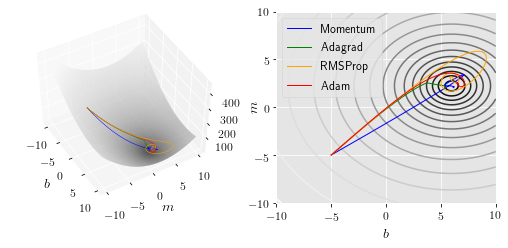

In [5]:



plt.style.use('ggplot')

     
# Update parameters for matplotlib
params = {"text.usetex": True,
          'font.size' : 12,
          "text.latex.unicode": True,
          "axes.unicode_minus": True,
          'xtick.color': 'black',
          'ytick.color': 'black',
          'axes.labelcolor': "black"
         
         }
plt.rcParams.update(params)


# Configure 3D plot.
fig = plt.figure()
fig.set_tight_layout(True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.35   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.35   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
plt.subplots_adjust(left, bottom, right, top,
                wspace, hspace)
# fig height and width in inch
fig.set_figheight(7.226/2)
fig.set_figwidth((7.226/3)*3)







ax1.set_xlabel('$b$')
ax1.set_ylabel('$m$')
ax1.view_init(50, -30)
ax1.set_facecolor('white')

msgrid, bsgrid = np.meshgrid(ms, bs)
surf = ax1.plot_surface(msgrid, bsgrid, cost,norm=LogNorm(), rstride=1, cstride=1, edgecolor='none',  cmap=cm.gray)
ax1.plot(np.array(points_List[0]).T.squeeze()[1],np.array(points_List[0]).T.squeeze()[0],CostL_List[0],linewidth=0.5,color = 'blue')
ax1.plot(np.array(points_List[1]).T.squeeze()[1],np.array(points_List[1]).T.squeeze()[0],CostL_List[1],linewidth=0.5,color = 'red')
ax1.plot(np.array(points_List[2]).T.squeeze()[1],np.array(points_List[2]).T.squeeze()[0],CostL_List[2],linewidth=0.5,color = 'green')
ax1.plot(np.array(points_List[3]).T.squeeze()[1],np.array(points_List[3]).T.squeeze()[0],CostL_List[3],linewidth=0.5,color = 'orange')



# Configure contour plot.
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(msgrid, bsgrid, cost,levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=cm.gray)
ax2.plot(np.array(points_List[0]).T.squeeze()[1],np.array(points_List[0]).T.squeeze()[0],linewidth=1,color = 'blue',label='Momentum')
ax2.plot(np.array(points_List[2]).T.squeeze()[1],np.array(points_List[2]).T.squeeze()[0],linewidth=1,color = 'green',label='Adagrad')
ax2.plot(np.array(points_List[3]).T.squeeze()[1],np.array(points_List[3]).T.squeeze()[0],linewidth=1,color = 'orange',label='RMSProp')
ax2.plot(np.array(points_List[1]).T.squeeze()[1],np.array(points_List[1]).T.squeeze()[0],linewidth=1,color = 'red',label='Adam')

#  ep[3,3,1,2]

ax2.set_xlabel('$b$')
ax2.set_ylabel('$m$')
ax2.yaxis.labelpad = -12
ax2.legend(loc='upper left')
plt.draw()
plt.savefig("Mo.pdf", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()